# Question 1

## (a)

In [1]:
library(faraway)
library(MASS)
library(lars)
library(data.table)
library(leaps)

Loaded lars 1.2



In [2]:
data(sat)

In [3]:
linear_model<-lm(total ~ expend + ratio + salary + takers, sat)

In [4]:
coef(linear_model)

(Intercept)      expend       ratio      salary      takers 
1045.971536    4.462594   -3.624232    1.637917   -2.904481

In [5]:
res1 <- residuals(lm(total ~ ratio + salary + takers, data = sat))
pres1 <- residuals(lm(expend ~ ratio + salary + takers, data = sat))

res2 <- residuals(lm(total ~ expend + salary + takers, data = sat))
pres2 <- residuals(lm(ratio ~ expend + salary + takers, data = sat))

res3 <- residuals(lm(total ~ expend + ratio + takers, data = sat))
pres3 <- residuals(lm(salary ~ expend + ratio + takers, data = sat))

res4 <- residuals(lm(total ~ expend + ratio + salary, data = sat))
pres4 <- residuals(lm(takers ~ expend + ratio + salary, data = sat))

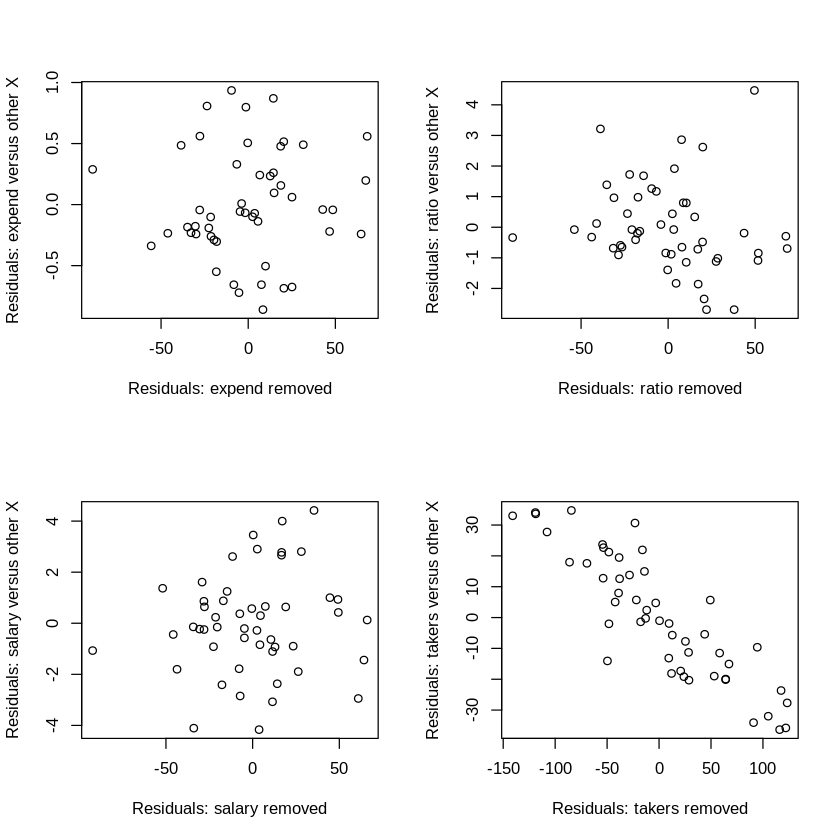

In [6]:
par(mfrow=c(2,2))
plot(res1,pres1,xlab="Residuals: expend removed",ylab="Residuals: expend versus other X")
plot(res2,pres2,xlab="Residuals: ratio removed",ylab="Residuals: ratio versus other X")
plot(res3,pres3,xlab="Residuals: salary removed",ylab="Residuals: salary versus other X")
plot(res4,pres4,xlab="Residuals: takers removed",ylab="Residuals: takers versus other X")

## (b)

In [7]:
hatv<-hatvalues(linear_model)
head(sort(hatv, decreasing=TRUE))

Utah  California Connecticut  New Jersey    New York      Alaska 
  0.2921128   0.2821179   0.2254519   0.2220978   0.1915752   0.1803061

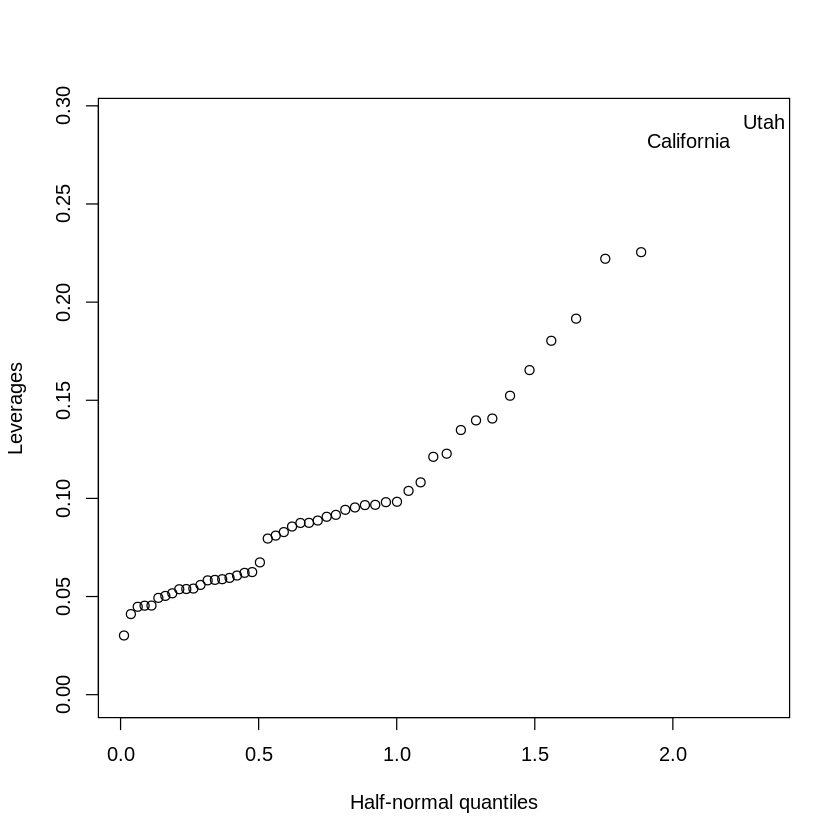

In [8]:
halfnorm(hatv,labs=row.names(sat),ylab='Leverages')

### The points with the largest leverage are Utah, California, Connecticut & New Jersey, all of which have values greater than twice the average 0.1.

## (c)

In [9]:
stud<-rstudent(linear_model)

In [10]:
stud[which.max(abs(stud))]

West Virginia 
    -3.124428

In [11]:
qt(0.025/length(hatv), length(hatv)-sum(hatv)-1)

[1] -3.525801

### West Virginia has the highest jackknife residual. Using the t distribution with df=44 with Bonferroni correction, the critical value is -3.526 therefore we cannot say that West Virginia is a significant outlier

## (d)

In [12]:
cook<-cooks.distance(linear_model)

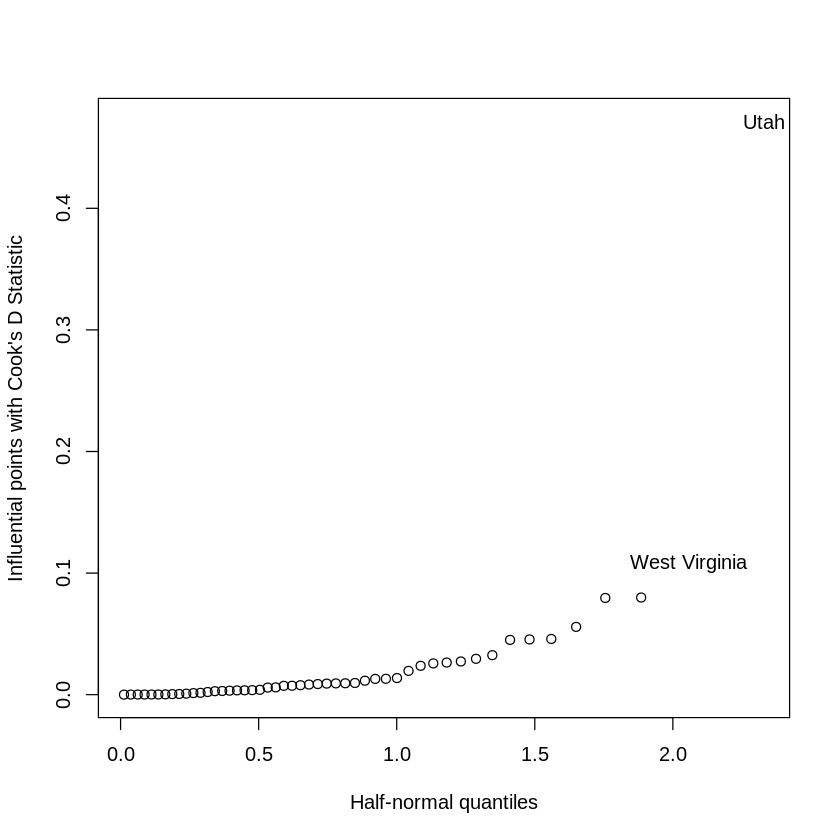

In [13]:
halfnorm(cook,labs=row.names(sat),ylab="Influential points with Cook's D Statistic")

### According to Cook's D Statistic, the most important states are Utah and West Virginia.

## (e)

In [14]:
vif(linear_model)

expend    ratio   salary   takers 
9.465320 2.433204 9.217237 1.755090

### It seems there is multicollinearity between the predictors as the VIF for each predictor is larger than 1

## (f)

In [15]:
linear_model_ridge<-lm.ridge(total ~ expend + ratio + salary + takers, data = sat,lambda = c(seq(0, 2, len=201), 3:1000))

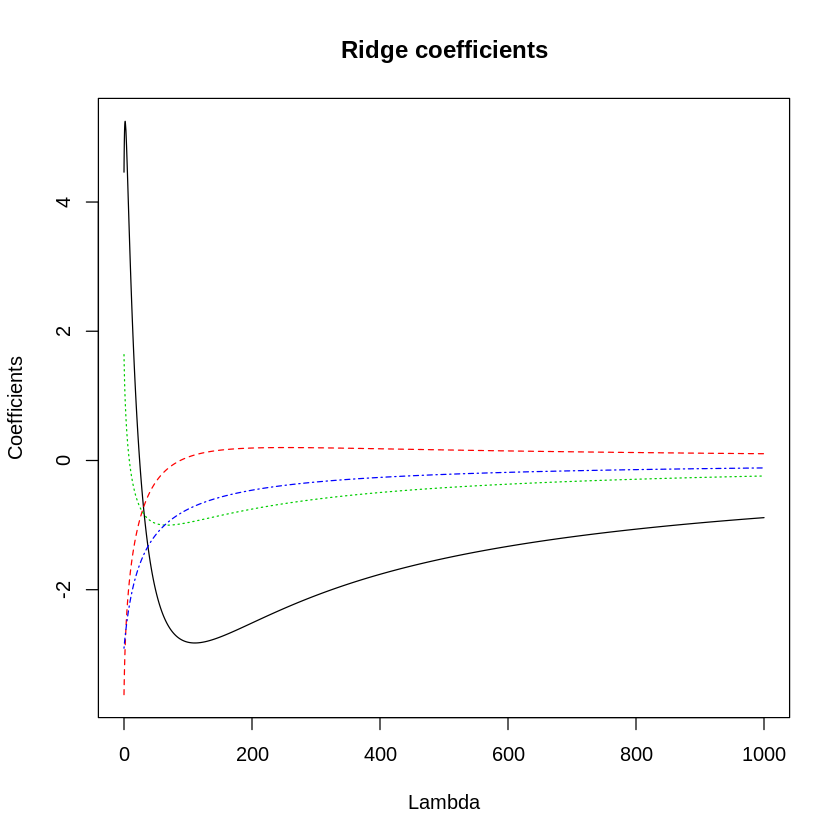

In [16]:
matplot(linear_model_ridge$lambda, coef(linear_model_ridge)[, -1], type = 'l', xlab = 'Lambda',
ylab = 'Coefficients', main = 'Ridge coefficients')

In [17]:
select(linear_model_ridge)

modified HKB estimator is 0.3496881 
modified L-W estimator is 0.4728102 
smallest value of GCV  at 1.23 


In [18]:
coef(linear_model_ridge)

,,expend,ratio,salary,takers
0.00,1045.972,4.462594,-3.624232,1.637917,-2.904481
0.01,1045.960,4.474679,-3.617974,1.632029,-2.903345
0.02,1045.948,4.486614,-3.611756,1.626177,-2.902212
0.03,1045.937,4.498402,-3.605578,1.620362,-2.901080
0.04,1045.926,4.510043,-3.599439,1.614583,-2.899950
0.05,1045.916,4.521540,-3.593338,1.608839,-2.898822
0.06,1045.906,4.532895,-3.587276,1.603131,-2.897695
0.07,1045.896,4.544108,-3.581252,1.597458,-2.896570
0.08,1045.886,4.555183,-3.575265,1.591820,-2.895447
0.09,1045.877,4.566120,-3.569316,1.586216,-2.894325


In [19]:
coef(linear_model_ridge)[124,]

expend       ratio      salary      takers 
1046.135846    5.198465   -3.061446    1.105367   -2.775341

## (g)

In [20]:
linear_model_lasso<-lars(as.matrix(sat[, 1:4]), sat$total)

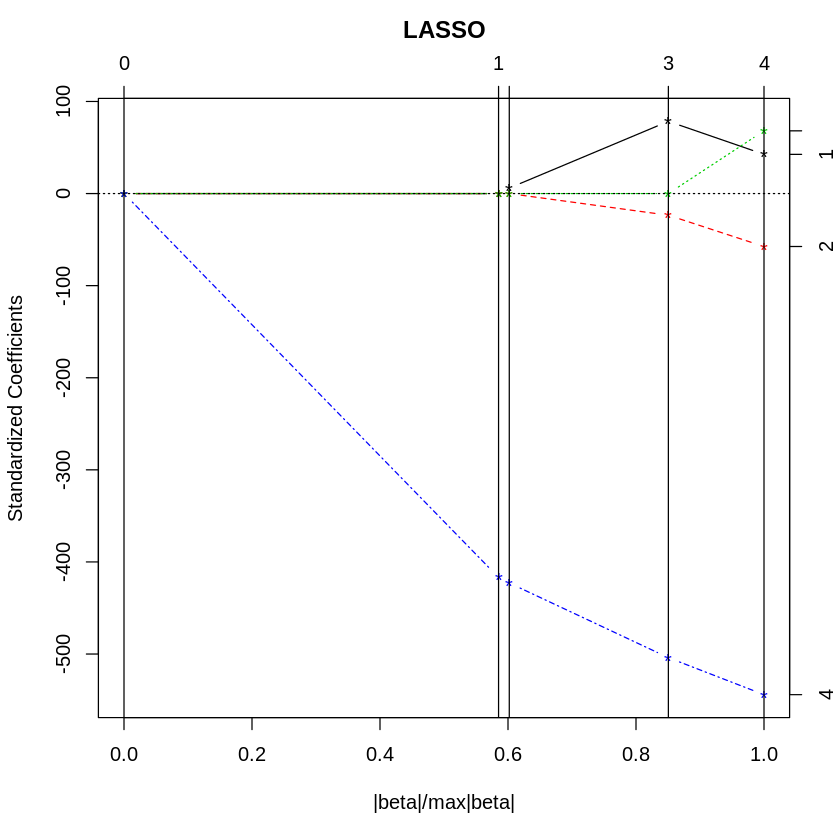

In [21]:
plot(linear_model_lasso)

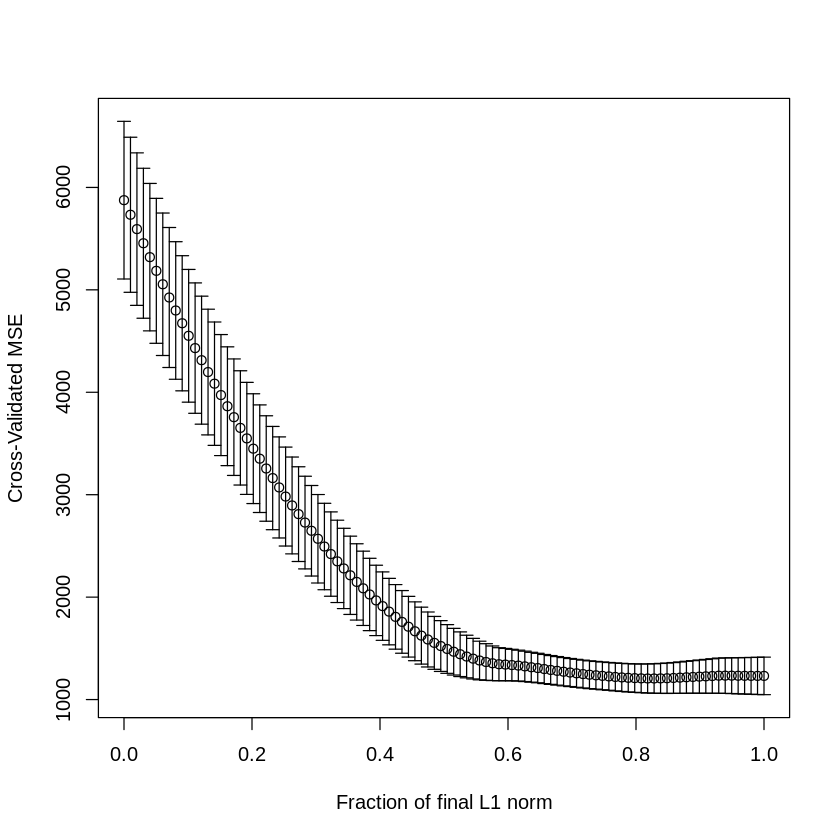

In [22]:
set.seed(4)
cv.linear_model_lasso<-cv.lars(as.matrix(sat[, 1:4]), sat$total)

In [23]:
(tval <- cv.linear_model_lasso$index[which.min(cv.linear_model_lasso$cv)])

[1] 0.8282828

In [24]:
predlars<-predict(linear_model_lasso, s=tval, type='coef', mode='fraction')

In [25]:
predlars$coef

expend     ratio    salary    takers 
 7.539338 -1.349857  0.000000 -2.651114

# Question 2

## (a)

In [26]:
housing <- fread('http://lib.stat.cmu.edu/datasets/boston_corrected.txt')
head(housing,3)

OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18,...,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0,...,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,Swampscott,1,2022,-70.936,42.2830,34.7,34.7,0.02729,0,...,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [27]:
x <- as.data.frame(housing[, 9:21])
boston_1 <- regsubsets(x, housing$CMEDV, method = 'forward', nvmax = 13)
boston_2 <- summary(boston_1)

## (a)

In [28]:
names(sort(colSums(boston_2$which[, -1]*1), decreasing=T))

[1] "LSTAT"   "RM"      "PTRATIO" "DIS"     "NOX"     "CHAS"    "B"      
 [8] "ZN"      "CRIM"    "RAD"     "TAX"     "INDUS"   "AGE"

## (b)

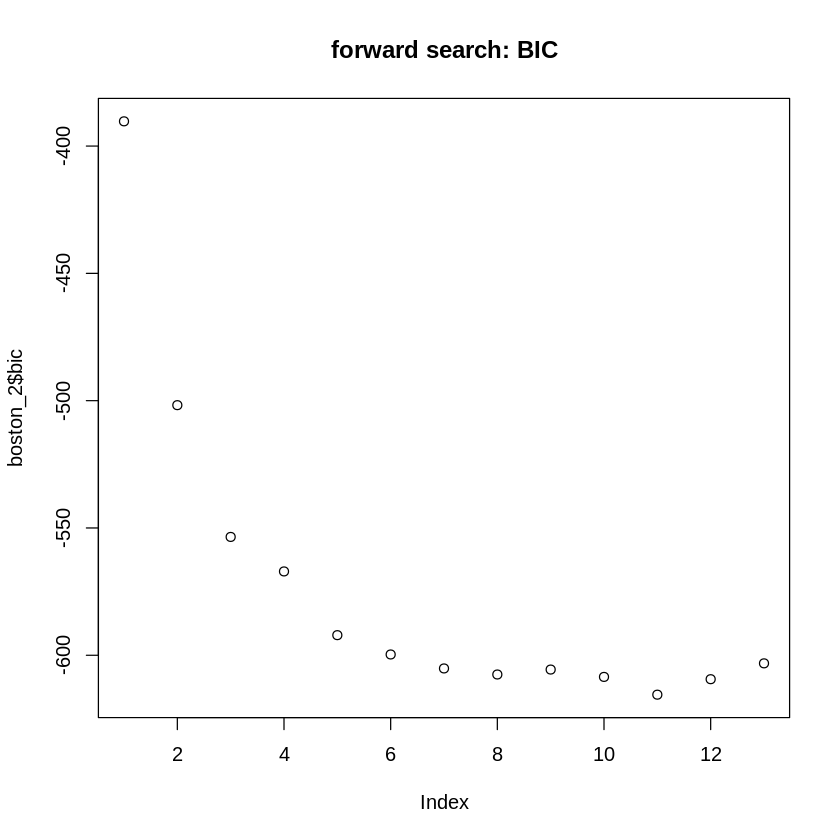

In [29]:
plot(boston_2$bic, main='forward search: BIC')

In [30]:
which.min(boston_2$bic)

[1] 11

In [31]:
names(which(boston_2$which[which.min(boston_2$bic), ]))

[1] "(Intercept)" "CRIM"        "ZN"          "CHAS"        "NOX"        
 [6] "RM"          "DIS"         "RAD"         "TAX"         "PTRATIO"    
[11] "B"           "LSTAT"

### The model with 11 parameters listed above minimizes BIC

## (c)

In [32]:
which(diff(boston_2$bic) > 0)

[1]  8 11 12

In [33]:
which(diff(boston_2$bic) > 0)[1]

[1] 8

In [34]:
names(which(boston_2$which[which(diff(boston_2$bic) > 0)[1], ]))

[1] "(Intercept)" "ZN"          "CHAS"        "NOX"         "RM"         
[6] "DIS"         "PTRATIO"     "B"           "LSTAT"

### If we stop the forward search when BIC starts to increase, we would be stopping at the 8th model, with predictors as stated above

## (d)

In [35]:
boston_3 <- regsubsets(x, housing$CMEDV, method = 'backward', nvmax = 13)

In [36]:
boston_4 <- summary(boston_3)

In [37]:
names(sort(colSums(boston_4$which[, -1]*1)))

[1] "AGE"     "INDUS"   "CHAS"    "CRIM"    "ZN"      "TAX"     "RAD"    
 [8] "B"       "NOX"     "DIS"     "PTRATIO" "RM"      "LSTAT"

## (e)

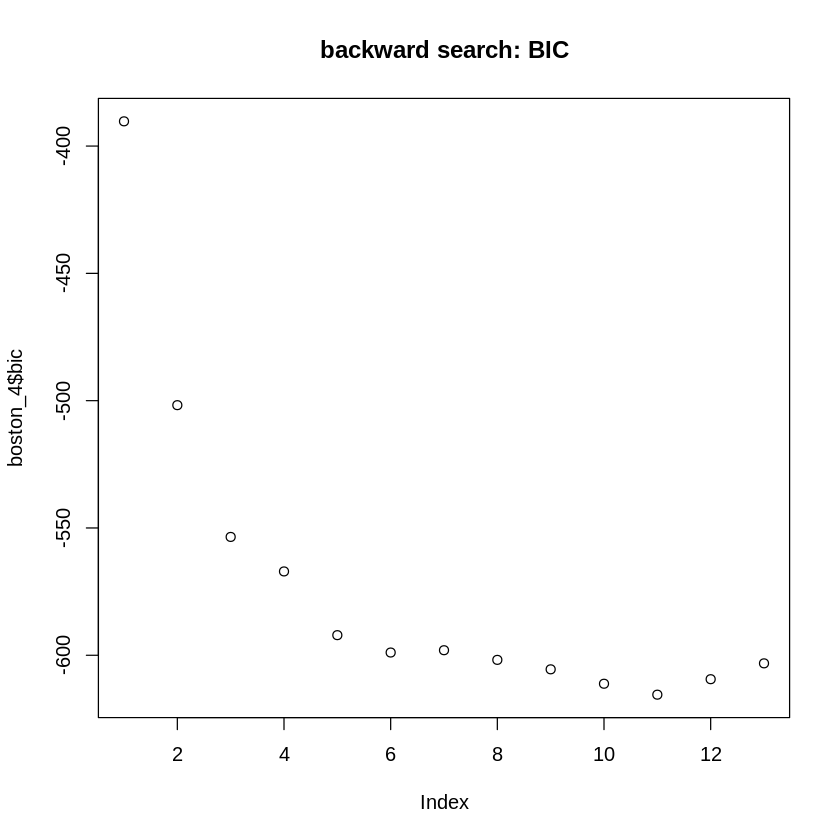

In [38]:
plot(boston_4$bic, main='backward search: BIC')

In [39]:
which.min(boston_4$bic)

[1] 11

In [40]:
names(which(boston_4$which[which.min(boston_4$bic), ]))

[1] "(Intercept)" "CRIM"        "ZN"          "CHAS"        "NOX"        
 [6] "RM"          "DIS"         "RAD"         "TAX"         "PTRATIO"    
[11] "B"           "LSTAT"

### As stated previously, the model with 11 parameters listed above minimizes BIC

## (f)

In [41]:
which(diff(rev(boston_4$bic)) > 0)

[1]  3  4  5  6  8  9 10 11 12

In [42]:
which(diff(rev(boston_4$bic)) > 0)[1]

[1] 3

In [43]:
names(which(boston_4$which[(14-which(diff(rev(boston_4$bic)) > 0)[1]), ]))

[1] "(Intercept)" "CRIM"        "ZN"          "CHAS"        "NOX"        
 [6] "RM"          "DIS"         "RAD"         "TAX"         "PTRATIO"    
[11] "B"           "LSTAT"

### If we stop the backward search when BIC starts to increase, we would be stopping at the 3rd model from the right, with predictors as stated above

## (g)

In [44]:
housing2 <- data.frame(x, CMEDV = housing$CMEDV)
out.null=lm(CMEDV~1, data=housing2)
full=formula(lm(CMEDV~.,housing2))
out.aic=step(out.null,scope=list(lower=~1,upper=full),k=2,direction="both",trace=F)
out.aic$anova[, c(1, 6)]

Step,AIC
,2244.870
+ LSTAT,1844.130
+ RM,1728.426
+ PTRATIO,1672.444
+ DIS,1654.666
+ NOX,1625.411
+ CHAS,1613.595
+ B,1603.882
+ ZN,1597.281
+ CRIM,1594.994


### The hybrid search using AIC model with 11 predictors.
### The order in which they enter the model is displayed above

## (h)

In [45]:
n = nrow(housing2)
out.bic=step(out.null,scope=list(lower=~1,upper=full),k=log(n),direction="both",trace=F)
out.bic$anova[, c(1, 6)]

Step,AIC
,2249.097
+ LSTAT,1852.584
+ RM,1741.106
+ PTRATIO,1689.350
+ DIS,1675.799
+ NOX,1650.771
+ CHAS,1643.181
+ B,1637.694
+ ZN,1635.319


### The hybrid search using BIC returns a model with 8 predictors

## (i)

### The same subsets of important variables are consistently selected by these different methods.
### BIC is more likely to penalize larger models than AIC